## This notebook goes through how to call functions that return the binned nuclear recoil spectrum for a future Xenon direct detection experiment. 

 First we import the polynomials, this uses the following files:
 - All files in the directory "Polys", these are were the polynomials reside, they approximate the response expected in a future experiment. 
 - ipol.config file tells the code which parameters are independent and which give rise to interference terms. 
 - config.dat tells the code how to sum the independent contributions, the numbers after the # symbol tells the code which bins to consider. 

In [1]:
import Xenon as Xe # Loads the polynomials in a python script. 

['Polys/ipol_All_sub2', 'Polys/ipol_All_sub0', 'Polys/ipol_All_sub4', 'Polys/ipol_All_sub6', 'Polys/ipol_All_sub5', 'Polys/ipol_All_sub13', 'Polys/ipol_All_sub17', 'Polys/ipol_All_sub14', 'Polys/ipol_All_sub7', 'Polys/ipol_All_sub15', 'Polys/ipol_All_sub8', 'Polys/ipol_All_sub3', 'Polys/ipol_All_sub16', 'Polys/ipol_All_sub18', 'Polys/ipol_All_sub9', 'Polys/ipol_All_sub1', 'Polys/ipol_All_sub11', 'Polys/ipol_All_sub10', 'Polys/ipol_All_sub12']

Visit us on http://professor.hepforge.org/
Please cite arXiv:0907.2973 [hep-ph]
                                          2019-07-08 19:45:26
 ______           __                            _____ _____
 | ___ \         / _|                          |_   _|_   _|
 | |_/ / __ ___ | |_ ___  ___ ___  ___  _ __     | |   | |
 |  __/ '__/ _ \|  _/ _ \/ __/ __|/ _ \| '__|    | |   | |
 | |  | | | (_) | ||  __/\__ \__ \ (_) | |      _| |_ _| |_
 |_|  |_|  \___/|_| \___||___/___/\___/|_|     |_____|_____|

 Andy Buckley, Holger Schulz                     

- Now we have two functions built into the Xe module, the most important is ret_ipol(PP) takes the parameter point (PP) as an argument. PP is a python dictionary, which you might want to revise how they work. 

In [7]:
print Xe.PP

{'c1': -6.29892585, 'c10': -2.0991558, 'c6': -1.0492314, 'mdm': 0.84042945}


- We see here that the parameter values are associated with their name. To change the value, you simply do the following

In [9]:
Xe.PP['c1']=-5.0

In [10]:
print Xe.PP

{'c1': -5.0, 'c10': -2.0991558, 'c6': -1.0492314, 'mdm': 0.84042945}


- Okay so now lets see what the ret_ipol function looks like

In [11]:
Xe.ret_ipol(Xe.PP)

{'/DM/XENON/counts': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

- It seems to work, but we have precisely zero in each bin. This is because the mass for this PP is too low to provoke a readable recoil. 
- This can be understood when one remembers that our galaxy has an escape veloctiy $v_{esc}$.
- From 2-body kinematics, the minimum velocity required to provoke a recoil of $E_R$, is given by $$v_{\min }=\sqrt{m_{N} E_{R} / 2 \mu_{N}^{2}}$$
- You can use this to try and find an estimate for the escape velocity we have used in this calculation.  
- It might be easier to do by making a function that takes in parameters directly, like the one below. 

In [20]:
def total_response(mass, c1):
    Xe.PP['mdm']=mass
    Xe.PP['c1']=c1
    return sum(Xe.ret_ipol(Xe.PP)['/DM/XENON/counts'])

In [22]:
total_response(0.9,-5)

0

- You may have noticed that the parameters are input on a logarithmic scale. If this is something you want to change, its simple enough. 

In [25]:
def set_coeffs(mass, c1):
    import numpy as np
    Xe.PP['mdm']=np.log10(mass)
    Xe.PP['c1']=np.log10(c1) 
    return

- You can even write a function to create new PPs

In [30]:
def new_PP(mdm, c1):
    import numpy as np
    PP_temp = {}
    PP_temp = {'mdm':np.log10(mdm), 'c1':np.log10(c1), 'c6':Xe.PP['c6'],
              'c10':Xe.PP['c10']}
    return PP_temp

In [31]:
new_PP(100, 1e-5)

{'c1': -5.0, 'c10': -2.0991558, 'c6': -1.0492314, 'mdm': 2.0}

- Where above we have used the already set values for c10 and c6 because where not using them at the moment. 
- These values are just above the minimum value trained under. 
- You can always check the polynomial ranges by using the following command

In [32]:
print Xe.PMAX, Xe.PMIN

[4.185838, -3.000478, 2.999724, 1.99197] [0.800409, -5.998977, -0.999268, -1.999196]


- Which in fact isn't all that helpful if you don't know what parameter each entry stands for. 
- We can list the parameters by

In [42]:
Xe.SIGNALS[Xe.SIGNALS.keys()[0]].pnames

['mdm', 'c1', 'c6', 'c10']

- And find out the limits of each parameter by

In [43]:
Xe.SIGNALS[Xe.SIGNALS.keys()[0]].limits['mdm'][0] 

0.800409

In [44]:
Xe.SIGNALS[Xe.SIGNALS.keys()[0]].limits['mdm'][1] 

4.185838

- The second important function allows you to plot the spectrum.
- It takes logarthmic inputs 

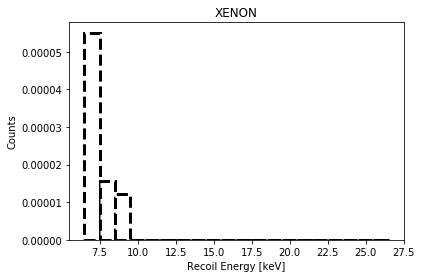

In [45]:
Xe.plot_ipol(mdm=1.0)

## Building an Exclusion limit 

- When building an experiment, you want to know how sensitive it will be given a certain setup. This can help you decide on what improvements are necessary to make a strong physics case. 
- A popular way to access this in direct dark matter detection is to estimate the exclusion limit your experiment will be able to put on the parameter space, assuming no DM signal is detected. 
- Statistically, direct detection can be represented as a counting experiment with its probability described by the Poisson distribution

$$\mathcal{P}\left(N_{\mathrm{obs}} | N_{\mathrm{th}}\right)=\frac{N_{\mathrm{th}}^{N_{\mathrm{obs}}} e^{-N_{\mathrm{th}}}}{N_{\mathrm{obs}} !}$$

- where $N_{\mathrm{th}}=N_{\mathrm{DM}}+N_{\mathrm{bk}}$, is the theoretical counts expected for a parameter point $\Theta$ and $N_{\mathrm{obs}}$ is the observed counts.
- Often one wants to find the 90% confidence level, i.e. that 90% of experiments would have detected more events given a theoretical expectation $N_{\mathrm{th}}$,

$$\sum_{m=N_{\mathrm{obs}}+1}^{\infty} \mathcal{P}\left(m | N_{b}, \Theta, \mathcal{M}_{i}\right)=0.9$$ 

- Assuming no background, $N_{\mathrm{bk}}=0.0$ and no observed events $N_{\mathrm{obs}}=0.0$, show that the 90% confidence limit corresponds to $N_{\mathrm{DM}}=2.303$

- Your immediate goal is to use the functions given above to take a mass value and return the c1 parameter value that corresponds to $N_{\mathrm{DM}}=2.303$.

- After that, you can do it for a series of mass values to get an exclusion limit similar to the one shown below.  

Text(0,0.5,'c1')

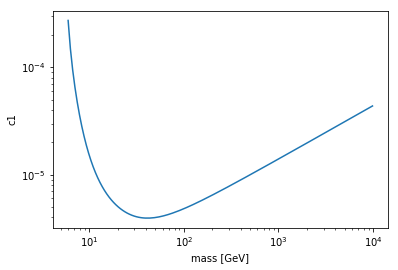

In [49]:
import numpy as np 
import matplotlib.pyplot as plt

data_30=np.genfromtxt('exclusion_Xe_30keV.dat', delimiter=' ')
plt.loglog(data_30[:,0], data_30[:,1])
plt.xlabel('mass [GeV]')
plt.ylabel('c1')